11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9017 - loss: 0.3229 - val_accuracy: 0.9880 - val_loss: 0.0433
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9887 - val_loss: 0.0375
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9898 - val_loss: 0.0402
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.9912 - val_loss: 0.0334
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9920 - val_loss: 0.0317
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9897 - loss: 0.0344
Test accuracy: 0.9921
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


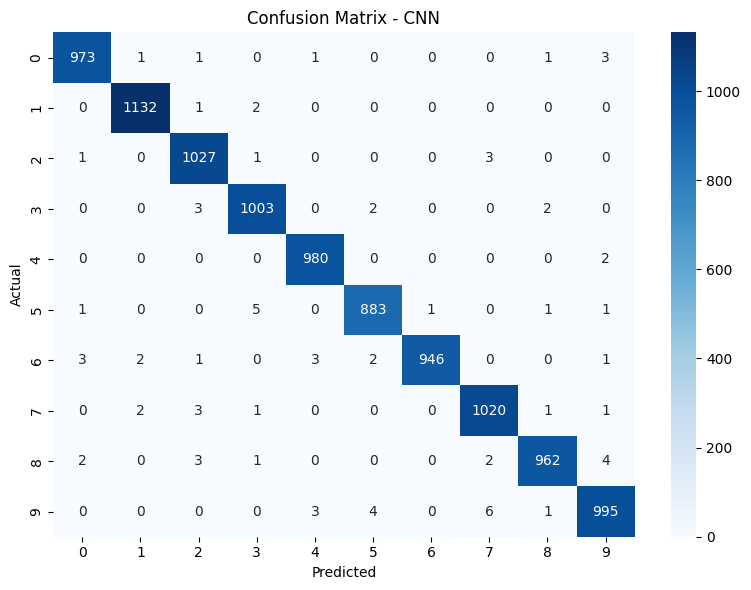

In [ ]:
import tensorflow as tf
from tensorflow import keras as ks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load data
(x_train, y_train), (x_test, y_test) = ks.datasets.mnist.load_data()

# Reshape input to fit CNN [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# CNN Model
model_cnn = ks.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Conv2D(64, (3, 3), activation='relu'),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Flatten(),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(10, activation='softmax')
])

# Compile
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model_cnn.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict
y_pred_probs = model_cnn.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.7707 - loss: 0.6373 - val_accuracy: 0.8615 - val_loss: 0.3708
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8538 - loss: 0.4026
Test Accuracy: 0.8513
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


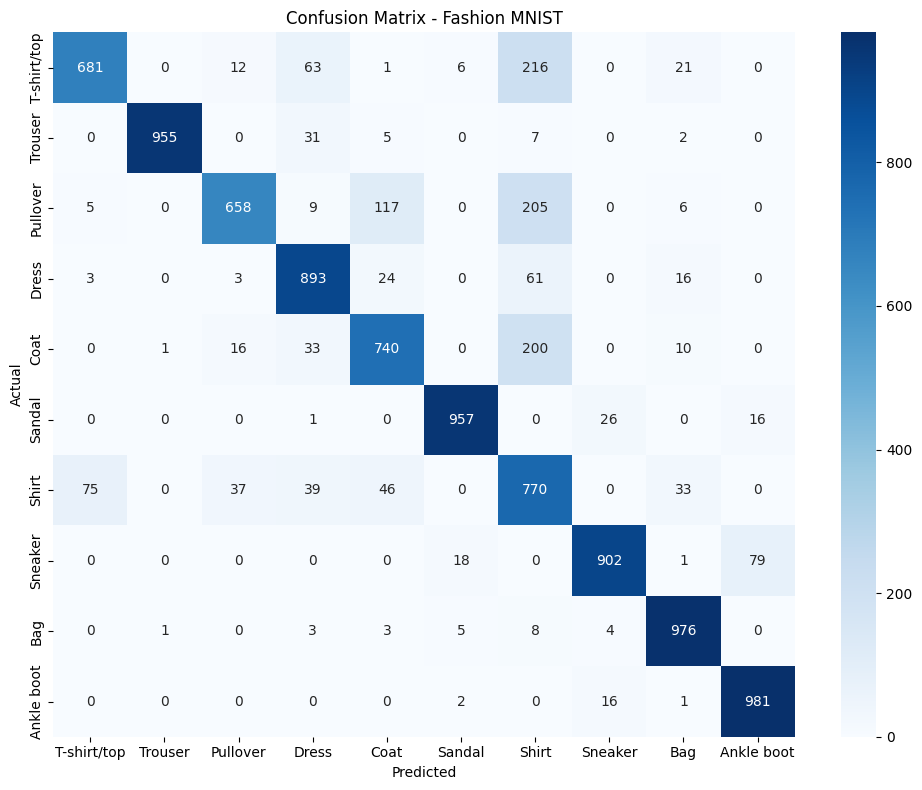

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.89      0.68      0.77      1000
     Trouser       1.00      0.95      0.98      1000
    Pullover       0.91      0.66      0.76      1000
       Dress       0.83      0.89      0.86      1000
        Coat       0.79      0.74      0.76      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.52      0.77      0.62      1000
     Sneaker       0.95      0.90      0.93      1000
         Bag       0.92      0.98      0.94      1000
  Ankle boot       0.91      0.98      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



In [ ]:
import tensorflow as tf
from tensorflow import keras as ks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = ks.datasets.fashion_mnist.load_data()

# Normalize pixel values and reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define CNN model
model = ks.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Conv2D(64, (3, 3), activation='relu'),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Flatten(),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=1, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Fashion MNIST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.8948 - loss: 0.3491 - val_accuracy: 0.9855 - val_loss: 0.0479
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9880 - val_loss: 0.0465
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9897 - val_loss: 0.0389
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9917 - val_loss: 0.0352
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9910 - val_loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9862 - loss: 0.0435
Original Model - Test accuracy: 0.9901
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step - accuracy: 0.7967 - loss: 0.6336 - val_accuracy: 0.9624 - val_loss: 0.1220
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9688 - loss: 0.1991

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.1991 - val_accuracy: 0.9611 - val_loss: 0.1243
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9538 - loss: 0.1502 - val_accuracy: 0.9738 - val_loss: 0.0794
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1090 - val_accuracy: 0.9728 - val_loss: 0.0806
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 78s 61ms/step - accuracy: 0.9674 - loss: 0.1020 - val_accuracy: 0.9796 - val_loss: 0.0613
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9751 - loss: 0.0736
Augmented Model - Test accuracy: 0.9796


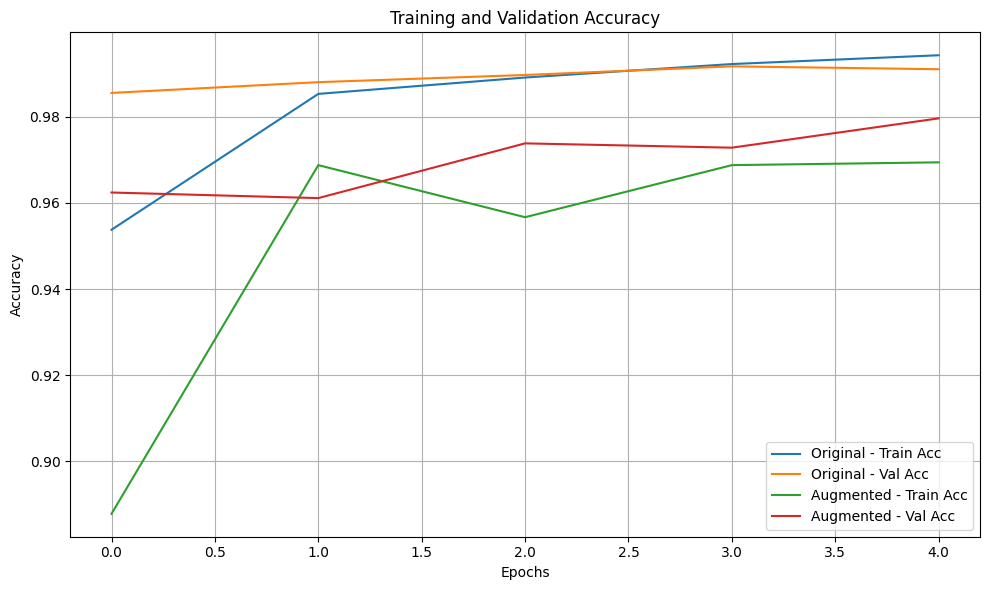

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report for Augmented Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.94      0.96      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.97      0.97       892
           6       0.96      0.98      0.97       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



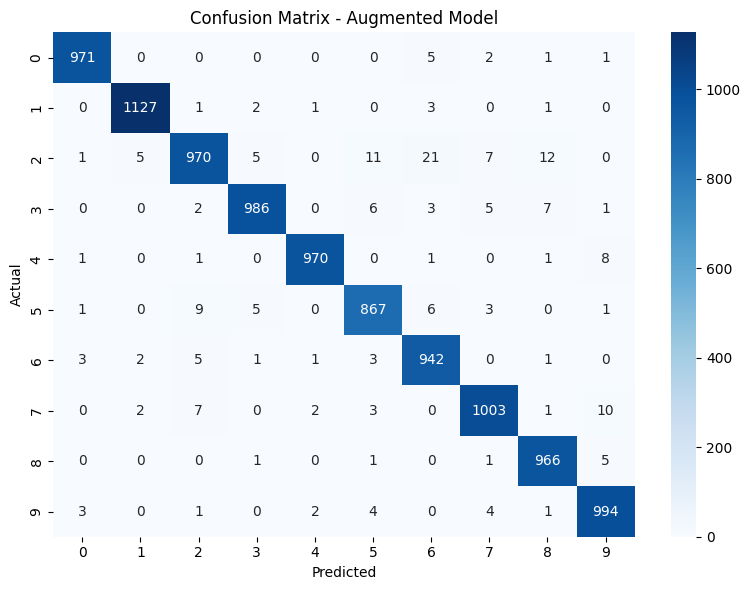

In [ ]:
import tensorflow as tf
from tensorflow import keras as ks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load data
(x_train, y_train), (x_test, y_test) = ks.datasets.mnist.load_data()

# Reshape input to fit CNN [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# ----------------------
# Original CNN Model
# ----------------------
def create_model():
    model = ks.Sequential([
        ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        ks.layers.MaxPooling2D((2, 2)),
        ks.layers.Conv2D(64, (3, 3), activation='relu'),
        ks.layers.MaxPooling2D((2, 2)),
        ks.layers.Flatten(),
        ks.layers.Dense(64, activation='relu'),
        ks.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train original model
model_cnn = create_model()
history_orig = model_cnn.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Evaluate original model
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test)
print(f"Original Model - Test accuracy: {test_acc:.4f}")

# ----------------------
# Data Augmentation
# ----------------------
datagen = ks.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_cnn)

# Train model with augmented data
model_aug = create_model()
history_aug = model_aug.fit(
    datagen.flow(x_train_cnn, y_train, batch_size=64),
    steps_per_epoch=len(x_train_cnn) // 64,
    epochs=5,
    validation_data=(x_test_cnn, y_test)
)

# Evaluate augmented model
test_loss_aug, test_acc_aug = model_aug.evaluate(x_test_cnn, y_test)
print(f"Augmented Model - Test accuracy: {test_acc_aug:.4f}")

# ----------------------
# Plot training & validation accuracy
# ----------------------
plt.figure(figsize=(10, 6))
plt.plot(history_orig.history['accuracy'], label='Original - Train Acc')
plt.plot(history_orig.history['val_accuracy'], label='Original - Val Acc')
plt.plot(history_aug.history['accuracy'], label='Augmented - Train Acc')
plt.plot(history_aug.history['val_accuracy'], label='Augmented - Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------
# Classification Report (Augmented Model)
# ----------------------
y_pred_probs = model_aug.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print classification report for augmented model
print("Classification Report for Augmented Model:")
print(classification_report(y_test, y_pred_classes))

# ----------------------
# Confusion Matrix (Augmented Model)
# ----------------------
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Augmented Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
